In [ ]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score

# Load the datasets from Excel files
annotation1 = pd.read_excel('/content/myFinalDataset(edited version).xlsx')
annotation2 = pd.read_excel('/content/myFinalDataset(edited version)_2.xlsx')
annotation3 = pd.read_excel('/content/myFinalDataset(edited version)_3.xlsx')

# Ensure the text columns match across the three datasets
assert annotation1['text'].equals(annotation2['text']), "Text columns in annotation1 and annotation2 do not match."
assert annotation1['text'].equals(annotation3['text']), "Text columns in annotation1 and annotation3 do not match."

# Combine the dataframes to ensure we handle NaNs across all annotations
combined = pd.DataFrame({
    'text': annotation1['text'],
    'label_1': annotation1['label'],
    'label_2': annotation2['label'],
    'label_3': annotation3['label']
})

# Drop rows with any NaNs in the label columns
combined.dropna(subset=['label_1', 'label_2', 'label_3'], inplace=True)

# Extract the labels after removing NaNs
label_1 = combined['label_1']
label_2 = combined['label_2']
label_3 = combined['label_3']

# Calculate Kappa scores for each pair
kappa_1_2 = cohen_kappa_score(label_1, label_2)
kappa_1_3 = cohen_kappa_score(label_1, label_3)
kappa_2_3 = cohen_kappa_score(label_2, label_3)

# Calculate the average Kappa score
average_kappa = (kappa_1_2 + kappa_1_3 + kappa_2_3) / 3

# Print the Kappa scores and the average
print(f"Kappa score between annotation 1 and 2: {kappa_1_2}")
print(f"Kappa score between annotation 1 and 3: {kappa_1_3}")
print(f"Kappa score between annotation 2 and 3: {kappa_2_3}")
print(f"Average Kappa score: {average_kappa}")


Kappa score between annotation 1 and 2: 0.9213050464931474
Kappa score between annotation 1 and 3: 0.8582817113720931
Kappa score between annotation 2 and 3: 0.7798546540102659
Average Kappa score: 0.8531471372918354


Kappa score between annotation 1 and 2: 0.9213050464931474
Kappa score between annotation 1 and 3: 0.8582817113720931
Kappa score between annotation 2 and 3: 0.7798546540102659
Average Kappa score: 0.8531471372918354
Label Distribution:
label
0.0    2452
1.0    2058
2.0    1777
Name: count, dtype: int64


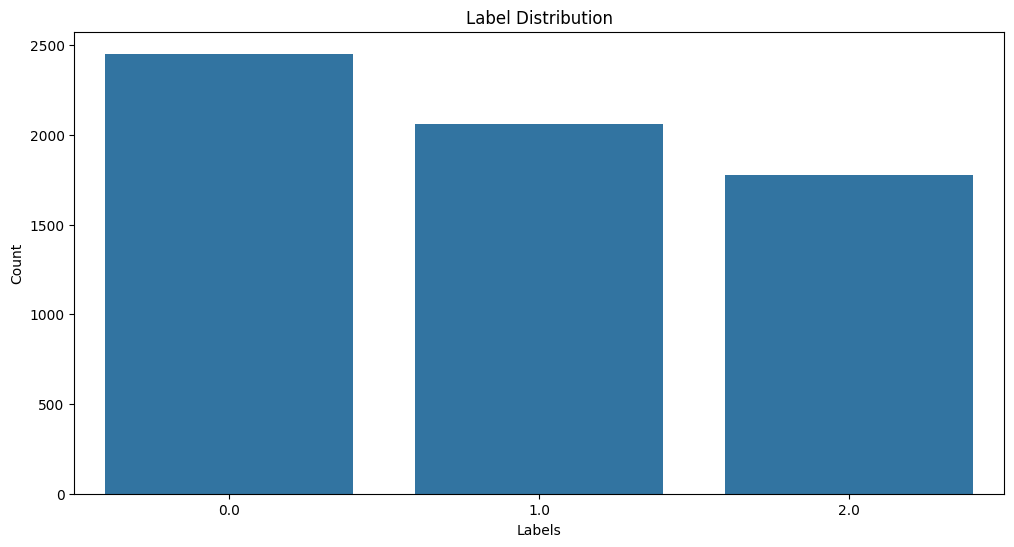

Text Length Distribution:
count    6287.000000
mean      125.598696
std       114.875356
min         9.000000
25%        68.000000
50%       104.000000
75%       152.000000
max      3298.000000
Name: text_length, dtype: float64


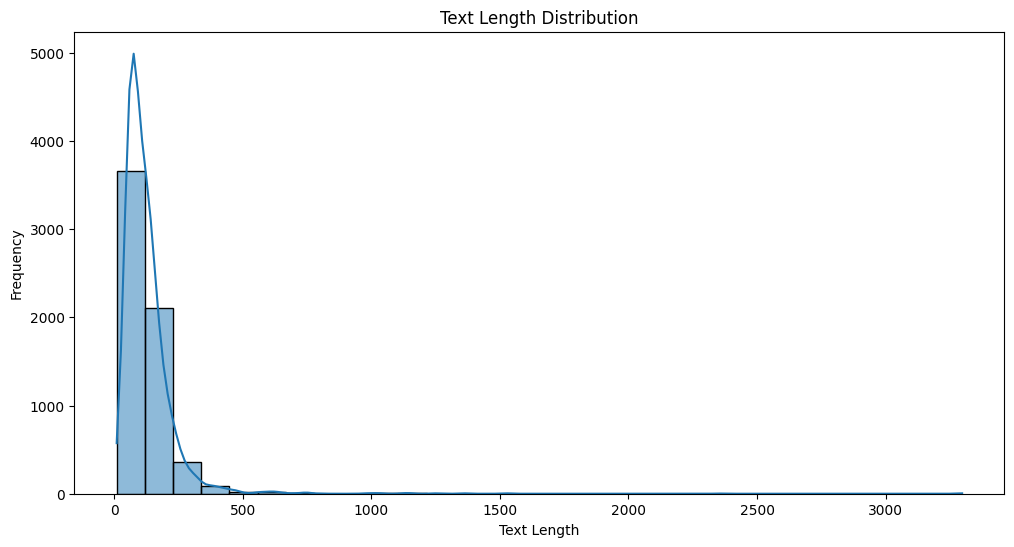

Most Common Words:
[('আমি', 2058), ('আমার', 1761), ('না', 1698), ('করে', 1212), ('এই', 1097), ('আর', 935), ('থেকে', 806), ('তার', 717), ('এবং', 710), ('মনে', 660), ('করতে', 641), ('জন্য', 641), ('যে', 599), ('সে', 590), ('অনেক', 562), ('কিন্তু', 532), ('ও', 528), ('কি', 513), ('সাথে', 507), ('একটা', 497)]


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2438 (\N{BENGALI LETTER AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2478 (\N{BENGALI LETTER MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2495 (\N{BENGALI VOWEL SIGN I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2494 (\N{BENGALI VOWEL SIGN AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/p

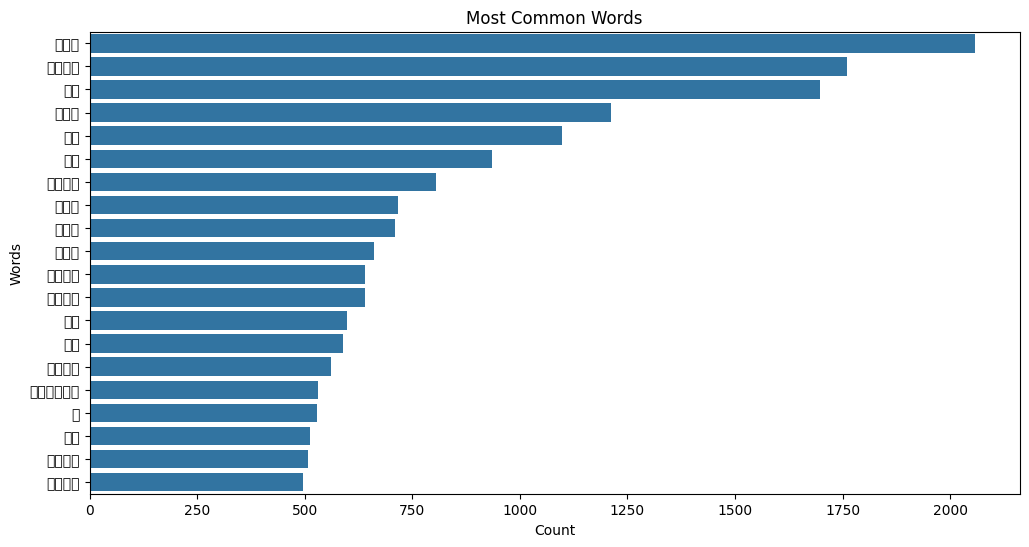

Text Length (in words) Distribution:
count    6287.000000
mean       21.815492
std        19.995824
min         2.000000
25%        12.000000
50%        18.000000
75%        26.000000
max       563.000000
Name: text_length, dtype: float64


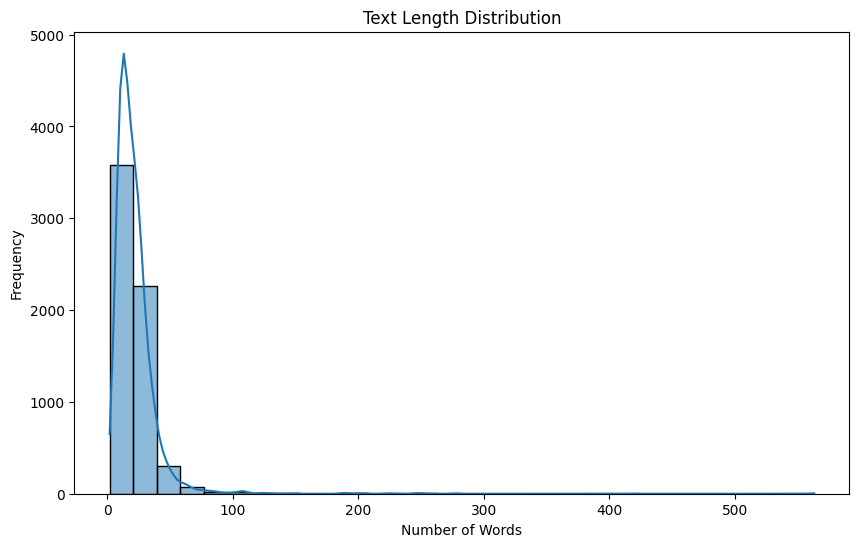

Unique Words Distribution:
count    6287.000000
mean       19.812788
std        14.359918
min         2.000000
25%        12.000000
50%        17.000000
75%        24.000000
max       336.000000
Name: unique_words, dtype: float64


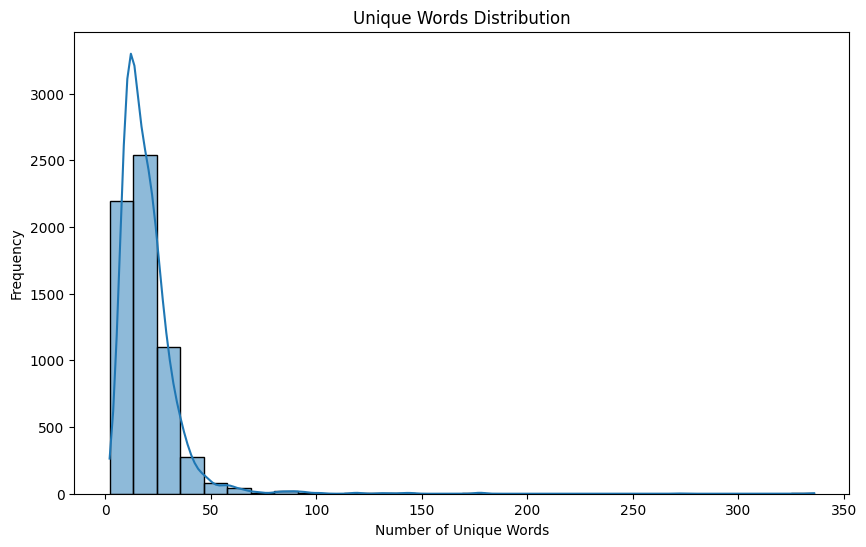

Average words per label:
label_1
0.0    24.864600
1.0    19.930515
2.0    19.791221
Name: text_length, dtype: float64


In [3]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# Load the datasets from Excel files
annotation1 = pd.read_excel('/content/myFinalDataset(edited version).xlsx')
annotation2 = pd.read_excel('/content/myFinalDataset(edited version)_2.xlsx')
annotation3 = pd.read_excel('/content/myFinalDataset(edited version)_3.xlsx')

# Ensure the text columns match across the three datasets
assert annotation1['text'].equals(annotation2['text']), "Text columns in annotation1 and annotation2 do not match."
assert annotation1['text'].equals(annotation3['text']), "Text columns in annotation1 and annotation3 do not match."

# Combine the dataframes to ensure we handle NaNs across all annotations
combined = pd.DataFrame({
    'text': annotation1['text'],
    'label_1': annotation1['label'],
    'label_2': annotation2['label'],
    'label_3': annotation3['label']
})

# Drop rows with any NaNs in the label columns
combined.dropna(subset=['label_1', 'label_2', 'label_3'], inplace=True)

# Extract the labels after removing NaNs
label_1 = combined['label_1']
label_2 = combined['label_2']
label_3 = combined['label_3']

# Calculate Kappa scores for each pair
kappa_1_2 = cohen_kappa_score(label_1, label_2)
kappa_1_3 = cohen_kappa_score(label_1, label_3)
kappa_2_3 = cohen_kappa_score(label_2, label_3)

# Calculate the average Kappa score
average_kappa = (kappa_1_2 + kappa_1_3 + kappa_2_3) / 3

# Print the Kappa scores and the average
print(f"Kappa score between annotation 1 and 2: {kappa_1_2}")
print(f"Kappa score between annotation 1 and 3: {kappa_1_3}")
print(f"Kappa score between annotation 2 and 3: {kappa_2_3}")
print(f"Average Kappa score: {average_kappa}")

# Corpus Analysis
# Distribution of labels
label_counts = annotation1['label'].value_counts()
print("Label Distribution:")
print(label_counts)

plt.figure(figsize=(12, 6))
sns.countplot(x='label', data=annotation1)
plt.title('Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

# Text Length Distribution
combined['text_length'] = combined['text'].apply(len)
text_length_desc = combined['text_length'].describe()
print("Text Length Distribution:")
print(text_length_desc)

plt.figure(figsize=(12, 6))
sns.histplot(combined['text_length'], bins=30, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

# Word Frequency Analysis
def word_frequency(texts):
    all_words = ' '.join(texts).split()
    word_freq = Counter(all_words)
    return word_freq

word_freq = word_frequency(combined['text'])
most_common_words = word_freq.most_common(20)
print("Most Common Words:")
print(most_common_words)

# Plotting the most common words
words, counts = zip(*most_common_words)
plt.figure(figsize=(12, 6))
sns.barplot(x=counts, y=words)
plt.title('Most Common Words')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()

# Text length analysis
combined['text_length'] = combined['text'].apply(lambda x: len(x.split()))
text_length_word_desc = combined['text_length'].describe()
print("Text Length (in words) Distribution:")
print(text_length_word_desc)

plt.figure(figsize=(10, 6))
sns.histplot(combined['text_length'], bins=30, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Unique words analysis
combined['unique_words'] = combined['text'].apply(lambda x: len(set(x.split())))
unique_words_desc = combined['unique_words'].describe()
print("Unique Words Distribution:")
print(unique_words_desc)

plt.figure(figsize=(10, 6))
sns.histplot(combined['unique_words'], bins=30, kde=True)
plt.title('Unique Words Distribution')
plt.xlabel('Number of Unique Words')
plt.ylabel('Frequency')
plt.show()

# Average words per label
average_words_per_label = combined.groupby('label_1')['text_length'].mean()
print("Average words per label:")
print(average_words_per_label)


Kappa score between annotation 1 and 2: 0.9213050464931474
Kappa score between annotation 1 and 3: 0.8582817113720931
Kappa score between annotation 2 and 3: 0.7798546540102659
Average Kappa score: 0.8531471372918354

Label Distribution (across all annotations):
Label 2.0: 5528
Label 0.0: 7241
Label 1.0: 6092

Average text length: 125.60 characters

Most common words by class:

Class depression:
আমি: 1325
না: 1050
আমার: 975
করে: 570
আর: 537
এই: 484
এবং: 400
থেকে: 390
তার: 380
করতে: 359

Class anxiety:
আমার: 637
আমি: 612
না: 552
করে: 445
ভয়: 396
এই: 372
মনে: 321
থেকে: 303
তার: 288
আর: 274

Class neutral:
আমার: 391
এই: 382
না: 379
করে: 367
আমি: 349
অনেক: 275
জন্য: 264
আর: 262
থেকে: 246
সে: 225

Unique words by class:

Class depression: 10289 unique words
{'বসবাস', 'শালী', 'কুণ্ডুলী', 'আমরাও।মা', 'বলেছিলো', 'চাঁদচলছে', 'নিবো', 'একাউন্টে', 'অনুনয়', 'আছ', 'আত্মহত্যার', 'আচ্ছা', 'একবারও', 'সোমবার', 'বিনির্মাণে', 'সহজে', 'অার', 'রান্না', 'আছি.', 'all', 'ব্যবস্থাকে', 'সড়ক', 'ধানচালের', 'লেগেছে

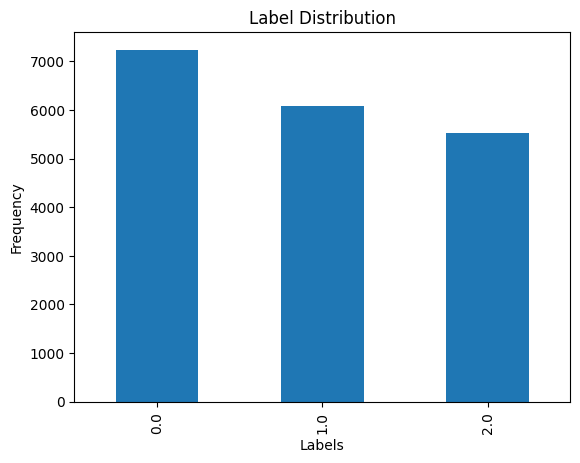

In [2]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

# Load the datasets from Excel files
annotation1 = pd.read_excel('/content/myFinalDataset(edited version).xlsx')
annotation2 = pd.read_excel('/content/myFinalDataset(edited version)_2.xlsx')
annotation3 = pd.read_excel('/content/myFinalDataset(edited version)_3.xlsx')

# Ensure the text columns match across the three datasets
assert annotation1['text'].equals(annotation2['text']), "Text columns in annotation1 and annotation2 do not match."
assert annotation1['text'].equals(annotation3['text']), "Text columns in annotation1 and annotation3 do not match."

# Combine the dataframes to ensure we handle NaNs across all annotations
combined = pd.DataFrame({
    'text': annotation1['text'],
    'label_1': annotation1['label'],
    'label_2': annotation2['label'],
    'label_3': annotation3['label']
})

# Drop rows with any NaNs in the label columns
combined.dropna(subset=['label_1', 'label_2', 'label_3'], inplace=True)

# Extract the labels after removing NaNs
label_1 = combined['label_1']
label_2 = combined['label_2']
label_3 = combined['label_3']

# Calculate Kappa scores for each pair
kappa_1_2 = cohen_kappa_score(label_1, label_2)
kappa_1_3 = cohen_kappa_score(label_1, label_3)
kappa_2_3 = cohen_kappa_score(label_2, label_3)

# Calculate the average Kappa score
average_kappa = (kappa_1_2 + kappa_1_3 + kappa_2_3) / 3

# Print the Kappa scores and the average
print(f"Kappa score between annotation 1 and 2: {kappa_1_2}")
print(f"Kappa score between annotation 1 and 3: {kappa_1_3}")
print(f"Kappa score between annotation 2 and 3: {kappa_2_3}")
print(f"Average Kappa score: {average_kappa}")

# Basic Statistics
label_counts = Counter(combined['label_1']) + Counter(combined['label_2']) + Counter(combined['label_3'])
print("\nLabel Distribution (across all annotations):")
for label, count in label_counts.items():
    print(f"Label {label}: {count}")

# Text Analysis
combined['text_length'] = combined['text'].apply(len)
average_text_length = combined['text_length'].mean()
print(f"\nAverage text length: {average_text_length:.2f} characters")

# Most frequent words for each class
labels = [0, 1, 2]
label_names = {0: 'depression', 1: 'anxiety', 2: 'neutral'}
word_counts_by_class = {label: Counter() for label in labels}
unique_words_by_class = {label: set() for label in labels}

for label in labels:
    texts = combined[(combined['label_1'] == label) | (combined['label_2'] == label) | (combined['label_3'] == label)]['text']
    words = ' '.join(texts).lower().split()
    word_counts_by_class[label].update(words)
    unique_words_by_class[label] = set(words)

print("\nMost common words by class:")
for label in labels:
    most_common_words = word_counts_by_class[label].most_common(10)
    print(f"\nClass {label_names[label]}:")
    for word, count in most_common_words:
        print(f"{word}: {count}")

# Unique words for each class
print("\nUnique words by class:")
for label in labels:
    print(f"\nClass {label_names[label]}: {len(unique_words_by_class[label])} unique words")
    print(unique_words_by_class[label])

# Label Agreement Analysis
agree_all = np.sum((label_1 == label_2) & (label_2 == label_3))
agree_two = np.sum((label_1 == label_2) | (label_2 == label_3) | (label_1 == label_3)) - agree_all
disagree_all = len(label_1) - (agree_all + agree_two)

print("\nLabel Agreement Analysis:")
print(f"All annotators agree: {agree_all}")
print(f"Two annotators agree: {agree_two}")
print(f"No annotators agree: {disagree_all}")

# Plotting the label distribution
label_dist = combined[['label_1', 'label_2', 'label_3']].apply(pd.Series.value_counts).fillna(0).sum(axis=1)
label_dist.plot(kind='bar', title='Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.show()


Kappa score between annotation 1 and 2: 0.9213050464931474
Kappa score between annotation 1 and 3: 0.8582817113720931
Kappa score between annotation 2 and 3: 0.7798546540102659
Average Kappa score: 0.8531471372918354


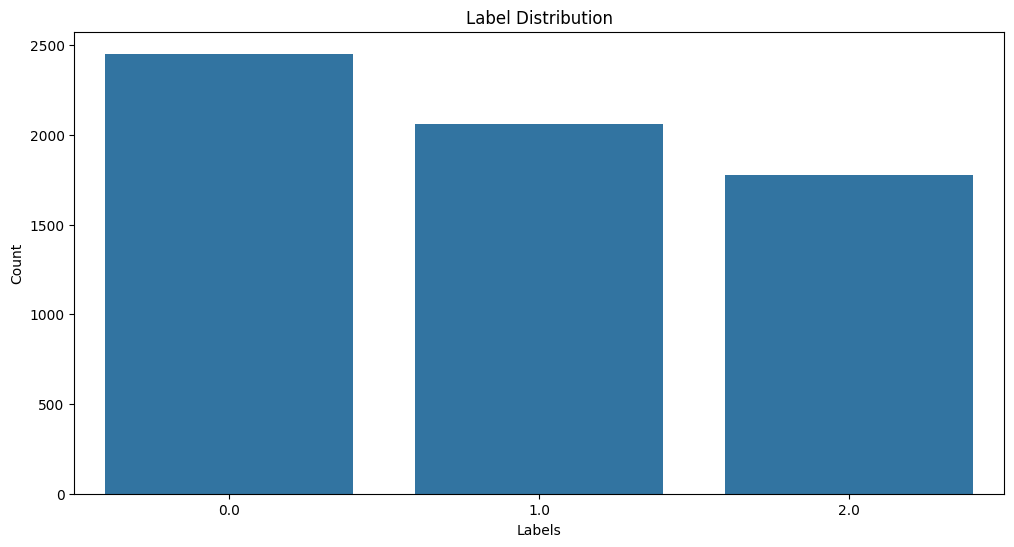

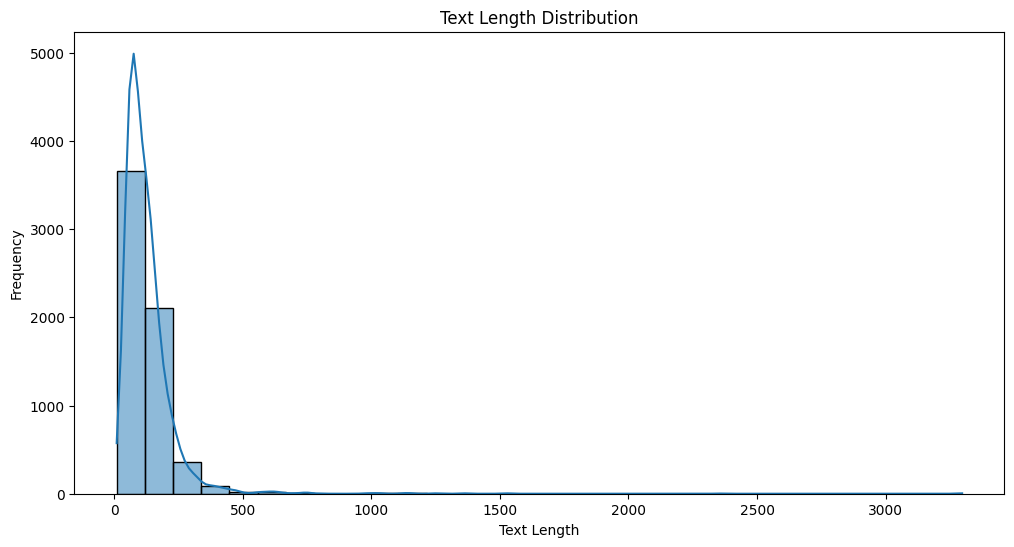

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2438 (\N{BENGALI LETTER AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2478 (\N{BENGALI LETTER MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2495 (\N{BENGALI VOWEL SIGN I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2494 (\N{BENGALI VOWEL SIGN AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/p

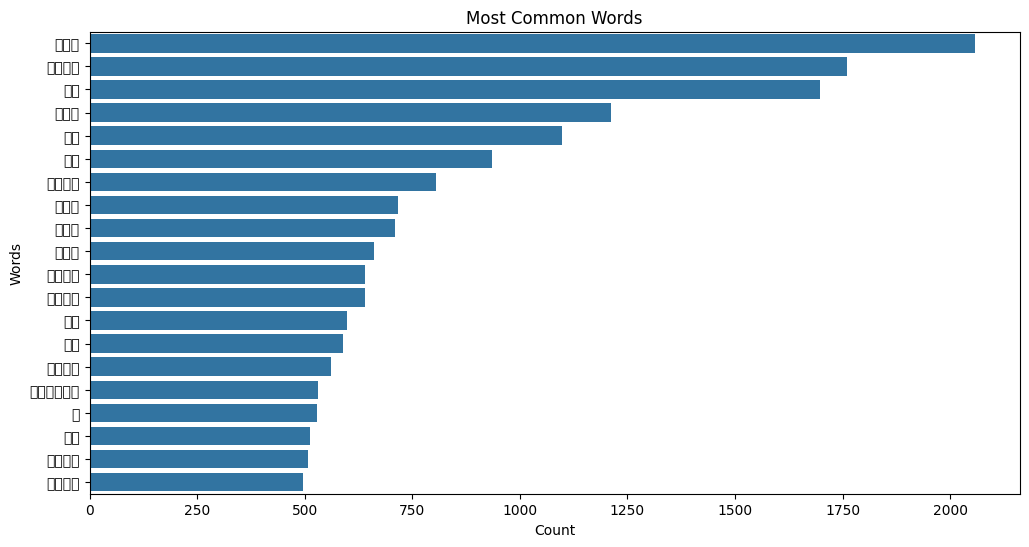

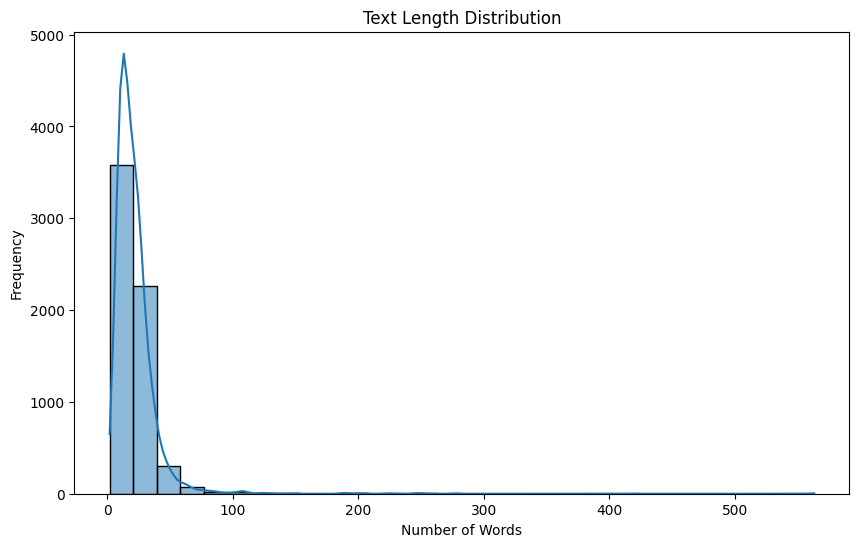

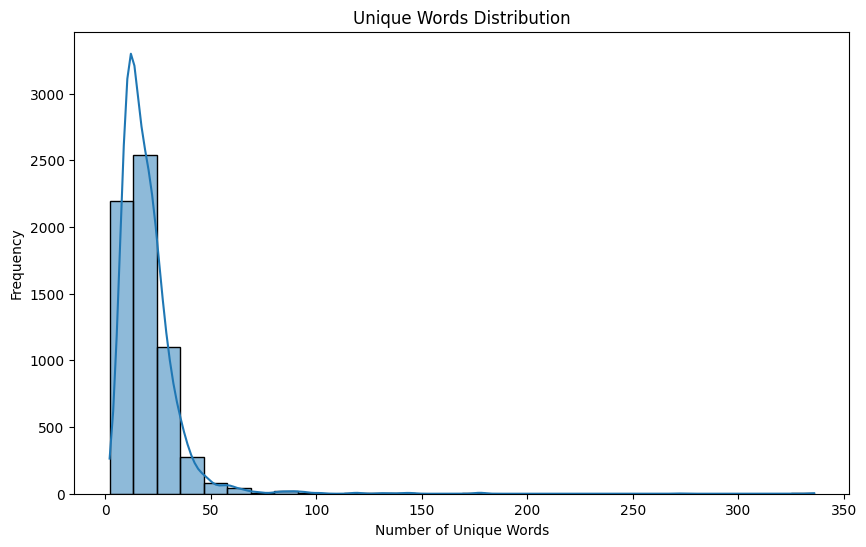

Average words per label:
label_1
0.0    24.864600
1.0    19.930515
2.0    19.791221
Name: text_length, dtype: float64


In [4]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# Load the datasets from Excel files
annotation1 = pd.read_excel('/content/myFinalDataset(edited version).xlsx')
annotation2 = pd.read_excel('/content/myFinalDataset(edited version)_2.xlsx')
annotation3 = pd.read_excel('/content/myFinalDataset(edited version)_3.xlsx')

# Ensure the text columns match across the three datasets
assert annotation1['text'].equals(annotation2['text']), "Text columns in annotation1 and annotation2 do not match."
assert annotation1['text'].equals(annotation3['text']), "Text columns in annotation1 and annotation3 do not match."

# Combine the dataframes to ensure we handle NaNs across all annotations
combined = pd.DataFrame({
    'text': annotation1['text'],
    'label_1': annotation1['label'],
    'label_2': annotation2['label'],
    'label_3': annotation3['label']
})

# Drop rows with any NaNs in the label columns
combined.dropna(subset=['label_1', 'label_2', 'label_3'], inplace=True)

# Extract the labels after removing NaNs
label_1 = combined['label_1']
label_2 = combined['label_2']
label_3 = combined['label_3']

# Calculate Kappa scores for each pair
kappa_1_2 = cohen_kappa_score(label_1, label_2)
kappa_1_3 = cohen_kappa_score(label_1, label_3)
kappa_2_3 = cohen_kappa_score(label_2, label_3)

# Calculate the average Kappa score
average_kappa = (kappa_1_2 + kappa_1_3 + kappa_2_3) / 3

# Print the Kappa scores and the average
print(f"Kappa score between annotation 1 and 2: {kappa_1_2}")
print(f"Kappa score between annotation 1 and 3: {kappa_1_3}")
print(f"Kappa score between annotation 2 and 3: {kappa_2_3}")
print(f"Average Kappa score: {average_kappa}")

# Corpus Analysis
# Distribution of labels
plt.figure(figsize=(12, 6))
sns.countplot(x='label', data=annotation1)
plt.title('Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

# Text Length Distribution
combined['text_length'] = combined['text'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(combined['text_length'], bins=30, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

# Word Frequency Analysis
def word_frequency(texts):
    all_words = ' '.join(texts).split()
    word_freq = Counter(all_words)
    return word_freq

word_freq = word_frequency(combined['text'])
most_common_words = word_freq.most_common(20)

# Plotting the most common words
words, counts = zip(*most_common_words)
plt.figure(figsize=(12, 6))
sns.barplot(x=counts, y=words)
plt.title('Most Common Words')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()

# Text length analysis
combined['text_length'] = combined['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(combined['text_length'], bins=30, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Unique words analysis
combined['unique_words'] = combined['text'].apply(lambda x: len(set(x.split())))
plt.figure(figsize=(10, 6))
sns.histplot(combined['unique_words'], bins=30, kde=True)
plt.title('Unique Words Distribution')
plt.xlabel('Number of Unique Words')
plt.ylabel('Frequency')
plt.show()

# Average words per label
average_words_per_label = combined.groupby('label_1')['text_length'].mean()
print("Average words per label:")
print(average_words_per_label)
